# Financial time series prediction using LSTM

Ever since the 2010s, the Deep Learning technique has been more and more popular in the financial market. This report presents the study on how different machine learning techniques are combined for the financial time series' forcasting.

## Introduction

A time series can be considered an orderd sequence of values of a varibale at equally spaced time intervals. The usually time seires problems can be categorized as:

1. Forecasting: 1-step / multi-step ahead of estimation of future values / movement's direction of the univariate or multivariate time series.

2. Anomaly detection: Detect anomalous values in past values.

3. Segmentation & regime detection: Detect event in past values for a period of time

A general time series forcasting pipeline consists of:

1. Analysis

2. Pre-processing

3. Modelling

4. Evaluation

![title](imgs/analysis_pipeline.png)




## The workflow

Below diagram shows the workflow we construct for this project. In this report, the FOREX **USD/GBP** daily historical time series data from 2010-09-10 to 2020-01-10 is chosen to perform the analysis, along with daily historical data of CRUDE OIL, GOLD, USD Index, and federal fund rate. Below is the Aanlysis steps in details. For the finalised dataset, we removed the dividend signal out, since we don't have a good quality for the captured dividend data. The volume is also remove as the FOREX market don't provide volume information.

![title](imgs/project_diagram.png)



### The Data Preparation Pipeline

Before we move to the modelling part, it's necessary to construct a pipeline for the data fitted into different models. The sanity check, stationariztion, anomaly detection and removal are important steps to preprocess the data for the further analysis. EDA helps you to understand how 40+ features contribute to the target variable, further Correlation analysis, DTR analysis, SOM anlysis help you to select the important features to the next step.



#### Missing Values Imputation

Precheck all the data sources ingested, 99.99% of data points have values, while consider of the error handling, the data pipeline will use Forward fill to handle the missing points.


#### Stationarizing

The drift exists in most of the equity, and FOREX product also have mean-reversion characteristics. If we target to predict the product movement delta, non-stationarity in mean need to be handled. Augment Dickey Fuller test, KPSS and Zivot Andrews test works good to detect the non stationarity. To remove the non-stationarity, both differencing ($y_t - y_{t-1}$) or $\log(y_t / y_{t-1})$ is a good choice. The stationarization can be both perform on the independent and dependent variables. During the data preparation, the different methodology is applied to the feature set via 'if_feature_delta' and 'if_target_delta'. 

#### Feature Engineering and Dimension Reduction

Before the modeling, exploratory data analysis (EDA) is conducted, as well as correlation analysis and descision tree regressor, which both serves the purpose of selecting the good features. Self Organising Map is performed with manual grouped feature set.

We later use stacked-autoencoder, proposed in [Bao W, Yue J, Rao Y (2017)][1], to conduct the dimension reduction. With 0.1 of loss in the validation set, the features reduce from 40+ to 5.

#### The Target Variables

Note that to satisfy the analysis, both continous target variable and binary target variable are constructed.

### The Model Pipeline

To compare the effect of different models for the target analysis, the model pipeline has been build up. For the target variables, we select the close price (continuous) and price movement direction (binary). 4 algorithms are chosen: 1 Layer LSTM, 2 Layer LSTM, Stacked Autoencoder + 1 Layer LSTM, and Stacked AutoEncoder + 2 Layer LSTM. For the backward time steps, we select 5, 10, 30.

For the 1 Layer LSTM, we used 1 hidden layer of 100 hidden units, no activation, dropout, and regularization are applied. The 2 Layer LSTM contain, 2 hidden LSTM layer of 256 hidden units, dropout rate of 0.5 after each layer, and dense layer of 64 units with Relu activitation, also The L1L2 regularization 0.01 is applied. The output layer, whether adding sigmoid activation or not  depends on the target variable is continuous or binary. The parameters of the Adam optimizer were a learning rate of 0.001, $\beta_1$ = 0.9, $\beta_2$ = 0.999, $\epsilon$ = 10−7.

MSE and accuracy are used to measure continuous and binary target variable separately.

## Experiment Result

For the computations we used Python, as well as Tensorflow v2.1 deep learning library. Keras use tensors with strong GPU acceleration. The computation environment we use Cloud based instance with 4 vCPUs, 16GB RAM, and 1 NVIDIA Tesla T4. One thing need to mention is the fit process for all models we use universal epoch = 500 and batch = 64, with earlystopping patience = 50. This could be a problem to train some deep network, while in consideration of compuation time, we didn't set the range of epoch to conduct.

Different experiments are conducted, below is the table:

|Target variables| Algorithms | NN Layers' units | Features | TimeStep | MSE |
| --- | --- | --- | --- | --- | --- |
|Continuous | 1 Layer LSTM | 100 1 | OHLC, Technicual Indicators, Fundamental Ratio | 5  |0.027009|
|Continuous | 1 Layer LSTM | 100 1 | OHLC, Technicual Indicators, Fundamental Ratio | 10 |0.026528|
|Continuous | 1 Layer LSTM | 100 1 | OHLC, Technicual Indicators, Fundamental Ratio | 30 |0.056609|
|Continuous | 2 Layer LSTM | 256 256 64 1 | OHLC, Technicual Indicators, Fundamental Ratio | 5  |0.057101|
|Continuous | 2 Layer LSTM | 256 256 64 1 | OHLC, Technicual Indicators, Fundamental Ratio | 10 |0.097710|
|Continuous | 2 Layer LSTM | 256 256 64 1 | OHLC, Technicual Indicators, Fundamental Ratio | 30 |0.146134|
|Continuous | StackedAutoEncoder + 1 Layer LSTM | 100 1 | OHLC, Technicual Indicators, Fundamental Ratio | 5  |0.026283|
|Continuous | StackedAutoEncoder + 1 Layer LSTM | 100 1 | OHLC, Technicual Indicators, Fundamental Ratio | 10 |0.025094|
|Continuous | StackedAutoEncoder + 1 Layer LSTM | 100 1 | OHLC, Technicual Indicators, Fundamental Ratio | 30 |0.026629|
|Continuous | StackedAutoEncoder + 2 Layer LSTM | 256 256 64 1 | OHLC, Technicual Indicators, Fundamental Ratio | 5  |0.056826|
|Continuous | StackedAutoEncoder + 2 Layer LSTM | 256 256 64 1 | OHLC, Technicual Indicators, Fundamental Ratio | 10 |0.089928|
|Continuous | StackedAutoEncoder + 2 Layer LSTM | 256 256 64 1 | OHLC, Technicual Indicators, Fundamental Ratio | 30 |0.075208|
|**Target variables**| **Algorithms** | **NN Layers' units** | **Features** | **TimeStep** | **Accuracy** |
|Binary | 1 Layer LSTM | 100 1 | OHLC, Technicual Indicators, Fundamental Ratio | 5  |0.506356|
|Binary | 1 Layer LSTM | 100 1 | OHLC, Technicual Indicators, Fundamental Ratio | 10 |0.533191|
|Binary | 1 Layer LSTM | 100 1 | OHLC, Technicual Indicators, Fundamental Ratio | 30 |0.519016|
|Binary | 2 Layer LSTM | 256 256 64 1 | OHLC, Technicual Indicators, Fundamental Ratio | 5  |0.544492|
|Binary | 2 Layer LSTM | 256 256 64 1 | OHLC, Technicual Indicators, Fundamental Ratio | 10 |0.511777|
|Binary | 2 Layer LSTM | 256 256 64 1 | OHLC, Technicual Indicators, Fundamental Ratio | 30 |0.431767|
|Binary | StackedAutoEncoder + 1 Layer LSTM | 100 1 | OHLC, Technicual Indicators, Fundamental Ratio | 5  |0.521186|
|Binary | StackedAutoEncoder + 1 Layer LSTM | 100 1 | OHLC, Technicual Indicators, Fundamental Ratio | 10 |0.518201|
|Binary | StackedAutoEncoder + 1 Layer LSTM | 100 1 | OHLC, Technicual Indicators, Fundamental Ratio | 30 |0.516779|
|Binary | StackedAutoEncoder + 2 Layer LSTM | 256 256 64 1 | OHLC, Technicual Indicators, Fundamental Ratio | 5  |0.555085|
|Binary | StackedAutoEncoder + 2 Layer LSTM | 256 256 64 1 | OHLC, Technicual Indicators, Fundamental Ratio | 10 |0.522484|
|Binary | StackedAutoEncoder + 2 Layer LSTM | 256 256 64 1 | OHLC, Technicual Indicators, Fundamental Ratio | 30 |0.539150|

As we can observe from the above experimental result. *1 Layer LSTM* shows the best performance for the continous variable, and *backward step 5* performs approximately the same compare with *backward step 10*, and *step 30* show worsest result among three. This simply because our model will be very hard to converge, with 2000+ train data set fit for 500+ lagging features. So it makes sense that *StackedAutoEncoder + 1 Layer LSTM* works best among all 4 models, despit of the *backward steps*. You can also observe that *MSE* reduce from *0.146134* to *0.075208* for *2 Layer LSTM*, once *StackedAutoEncoder* comes into play.

For the binary variable, the 2 Layer LSTM using *time step 30* has great underfitting issue, and the result shows much better after *StackedAutoEncoder* involved, from 43.2% to 53.9%. The model works best when using *backward step 5* and '*StackedAutoEncoder + 2 Layer LSTM*', comes to the accuracy of 55.5%.

## Conclusion

Deal with Deep Learning is an arts in some sense. The deep learning techniques have proven be one of most successful modelling approaches in all aspects of domain required machine learning. On the other hand, to dig out the good features fitted into the right model requires lots of manual works for the class of the asset price prediction problems. Here, it categorizes the following diffculities: 

* **Shape the good features and analysis target**:

    What's the data granularity, whether use intraday or daily 
    
    Which technical indicators and fundemntal data
    
    How to select features out of the correlated asset movement
    
    How to integrate between the different timeframe data, e.g. NLP sentiment is usually available after 2018 (from API or public accessible data). The daily asset's price record can go back to 1980s.
    
    Whether use delta based features, is this applicable to techical indicators as well.
    
    Whether use continous target to train the model, or binary target. If we use binary target, do we need to binarize all features or partial features. If we use continous target, is it good to transfer the buy /sell signal from sign ($r_t *\hat{r}_t$)[2]
    
    Whether use price or price changes for the target, the LSTM shows good capability to smooth the true price from the backward time steps, as the LSTM perform quite good job of minimzing the MSE. However, it the price change is used as the target variable (residual between t and t-1), for the experiments I tried, the LSTM fail drastically. Either the model learn to stick around the mean line (as the price change of FOREX usually show to be stationary), or the model is unable to converge. Dealing with this target variables need to take care of processing the feature set, for some features are necessary to use residual instead of actual values, as the target variable changed. For some features, they might not applicable to use anymore. The EDA analysis will take lots of manual effort to conduct again.
    
* **Select the good model and measurements**:

    What's the good measurement, MSE, MAPE, Pearson_R, Theil_U for continuous variable; Accuracy, f1 score for binary variable.
    
    How to perform the profitablity measurement, use annual % return and SHARP Ratio.
    
    Should we use simple model, or complex model. What's the hidden unit that's good to fit for different train set situtaions.

Back to our experiments, we've tested a large combinations of model in the multivariate context. The LSTM shows good performance combined with Stack Autoencoder, on out-of-sample data. We can conclude that LSTM networks are a promising modelling techinque in predicting the asset price, especially for the multivariate financial time series.

## Further Study

The Wavelet + Autoencoder + LSTM model proposed in [1] shows the overwhelming performance boost, reduce MAPE from 0.024 to0.015, compared with the naive LSTM model, on the dataset of HS Index. The wavelet transform is one of the singal processing technique to scale and shift the time series data. By decomposing the input time seires into multi-resolution, it helps to denoise the time series.

The article [2] mentioned that it archieved on average 59% ~ 62% accuracy of hit ratio, using *1,2,5,10 backward time step*, features of *daily returns of 50 SP500 stock* & *oil gold daily commedity price*, and 1 Layer LSTM with 50 ~ 150 hidden units + softmax output of 50 stocks. It's doubtful such good accuracy is achieveable or not. To test the accuracy, I replicated the process (2 stocks are off list, so only grab 48 stocks) and get the following result, on average of 50.76%.

|Stocks|hit_ratio|
| --- | --- |
|AAPL|46.86%|
|MSFT|46.19%|
|FB|53.78%|
|AMZN|43.76%|
|JNJ|52.33%|
|BRKB|50.86%|
|JPM|47.76%|
|XOM|49.29%|
|GOOGL|53.82%|
|GOOG|57.58%|
|BAC|48.09%|
|PG|51.53%|
|T|46.66%|
|WFC|49.75%|
|GE|48.39%|
|CVX|50.61%|
|PFE|50.15%|
|VZ|50.84%|
|CMCSA|46.82%|
|UNH|47.18%|
|V|56.97%|
|C|48.91%|
|PM|51.50%|
|HD|46.27%|
|KO|51.58%|
|MRK|51.17%|
|PEP|52.55%|
|INTC|48.75%|
|CSCO|46.52%|
|ORCL|52.90%|
|ABC|53.75%|
|DIS|48.56%|
|BA|52.96%|
|AMGN|52.15%|
|MCD|53.77%|
|MA|58.66%|
|IBM|51.22%|
|MO|52.88%|
|MMM|54.03%|
|ABBV|53.99%|
|WMT|51.61%|
|MDT|51.99%|
|GILD|51.34%|
|HON|45.77%|
|NVDA|45.48%|
|AVGO|54.73%|
|BMY|52.24%|
|ABT|52.19%|



The Bidirectional LSTM model[3] is also another algorithm that worthy trying, it's implemented in the code (*Class BidirectionalModel*) but not test the peroformance yet.

More features from historical 1min intraday, book data, streaming sentiment / news, revealed the potential the build up a higher frequent and accurate solution of asset movement prediction.

## References

[1] Bao W, Yue J, Rao Y (2017) A deep learning framework for financial time series using stacked autoencoders and long-short term memory.

[2] Miquel N. Alonso, Deep Learning in Finance: Prediction of Stock Returns with Long Short-Term Memory Networks

[3] K. A. Althelaya, E. M. El-Alfy and S. Mohammed, Evaluation of bidirectional LSTM for short-and long-term stock market prediction.

# Experiment Part

## EDA

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Model
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure()
import numpy as np
import pandas as pd
import os
%matplotlib inline

# Import required libraries
import pandas as pd
import numpy as np

# Import preprocessor from sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Import cufflinks for visualization
import cufflinks as cf
cf.set_config_file(offline=True)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
import sys
from utils import prep_ticker_data, load_external_data, StackedAutoencoderModel, Simple_LSTM_Model, LSTMModel, BidirectionalModel

In [2]:
start_date='2010-09-10'
end_date='2020-01-10'
df_result = prep_ticker_data('USDGBP=X', start_date = start_date, end_date = end_date, \
                             if_features_delta = False, if_target_delta = False, \
                             if_features_binary = False, if_target_binary = False, \
                             shift_days = 1, target_variable = 'label')
df_result = load_external_data(df_result, if_delta = False, if_features_binary = False, window = 30)

#reorder the columns
column_lst = list(df_result.columns[df_result.columns != 'label'])
column_lst.append('label')
df_result = df_result[column_lst]
df_result.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,CCI_5,CCI_10,CCI_21,CCI_50,ATR_5,ATR_10,...,STD_5,STD_10,STD_21,STD_50,return,GOLD_Close,OIL_Close,Federal_Fund_Rate_Close,USD_Index_Close,label
Date,,,,,,,,,,,,,,,,,,,,,
2010-11-22,0.62305,0.62734,0.62131,0.62298,-0.380359,0.276010,-0.244899,-0.883634,0.006545,0.006629,...,0.003904,0.003874,0.006843,0.007936,0.00185,1358.390000,83.356667,0.192667,77.695333,0.62483
2010-11-23,0.62490,0.62723,0.62167,0.62483,-0.581752,0.332773,-0.040413,-0.771107,0.006217,0.006435,...,0.002897,0.003322,0.006393,0.007459,0.00226,1358.556667,83.341000,0.192667,77.732133,0.62709
2010-11-24,0.62716,0.63068,0.62673,0.62709,0.699384,1.222798,0.763881,-0.230620,0.006095,0.006328,...,0.002585,0.003306,0.005735,0.007019,0.00562,1359.523333,83.327000,0.193000,77.804600,0.63271
2010-11-25,0.63286,0.63511,0.63137,0.63271,1.564600,1.881152,1.810860,0.551810,0.006736,0.006636,...,0.003694,0.004273,0.005390,0.006747,0.00060,1359.756667,83.327000,0.193333,77.893000,0.63331
2010-11-26,0.63332,0.63581,0.63315,0.63331,1.133468,1.646133,1.926861,0.751255,0.005524,0.005993,...,0.004645,0.004653,0.005554,0.006617,0.00122,1359.756667,83.355333,0.193667,77.986800,0.63453


In [3]:
import sys
sys.path.insert(0, '../')
%load_ext autoreload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
%matplotlib inline
import seaborn as sns
from minisom import MiniSom
from sklearn.preprocessing import minmax_scale, scale
%autoreload 2

**In case of the over engineering, we perform the EDA on train data set instead of the whole data set.**

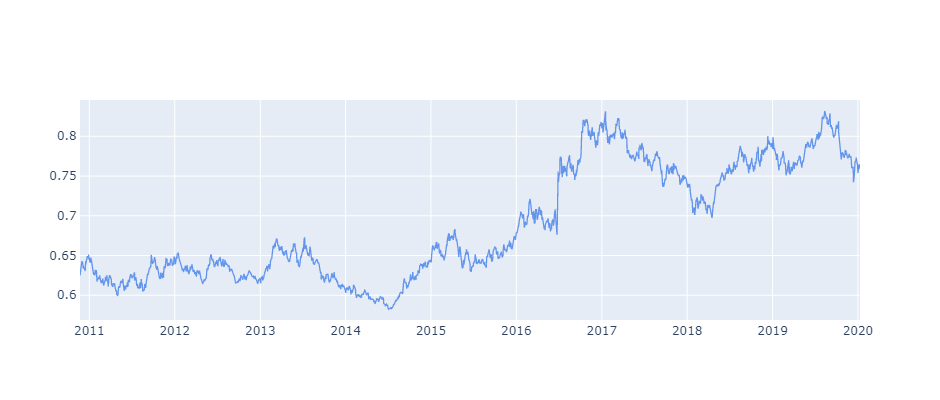

In [4]:
# Visualize the data
custom_layout = cf.Layout(height=400, width=800)
df_result['label'].iplot(title = 'USDGBP Price', color = 'cornflowerblue', layout=custom_layout)

### Data Split

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Splitting the datasets into training and testing data.
train_data, test_data = train_test_split(df_result, train_size=0.8, test_size=0.2, shuffle=False)

feature_names = train_data.columns
dataset = train_data[feature_names].values
dataset = scale(dataset)

df_result_scaled = pd.DataFrame(dataset, columns=feature_names)
y = df_result_scaled['label']#.iloc[:,np.where[df_result.columns=='label'][] ]
Xs = df_result_scaled[df_result_scaled.columns[df_result_scaled.columns!='label']]

### Correlation Analysis

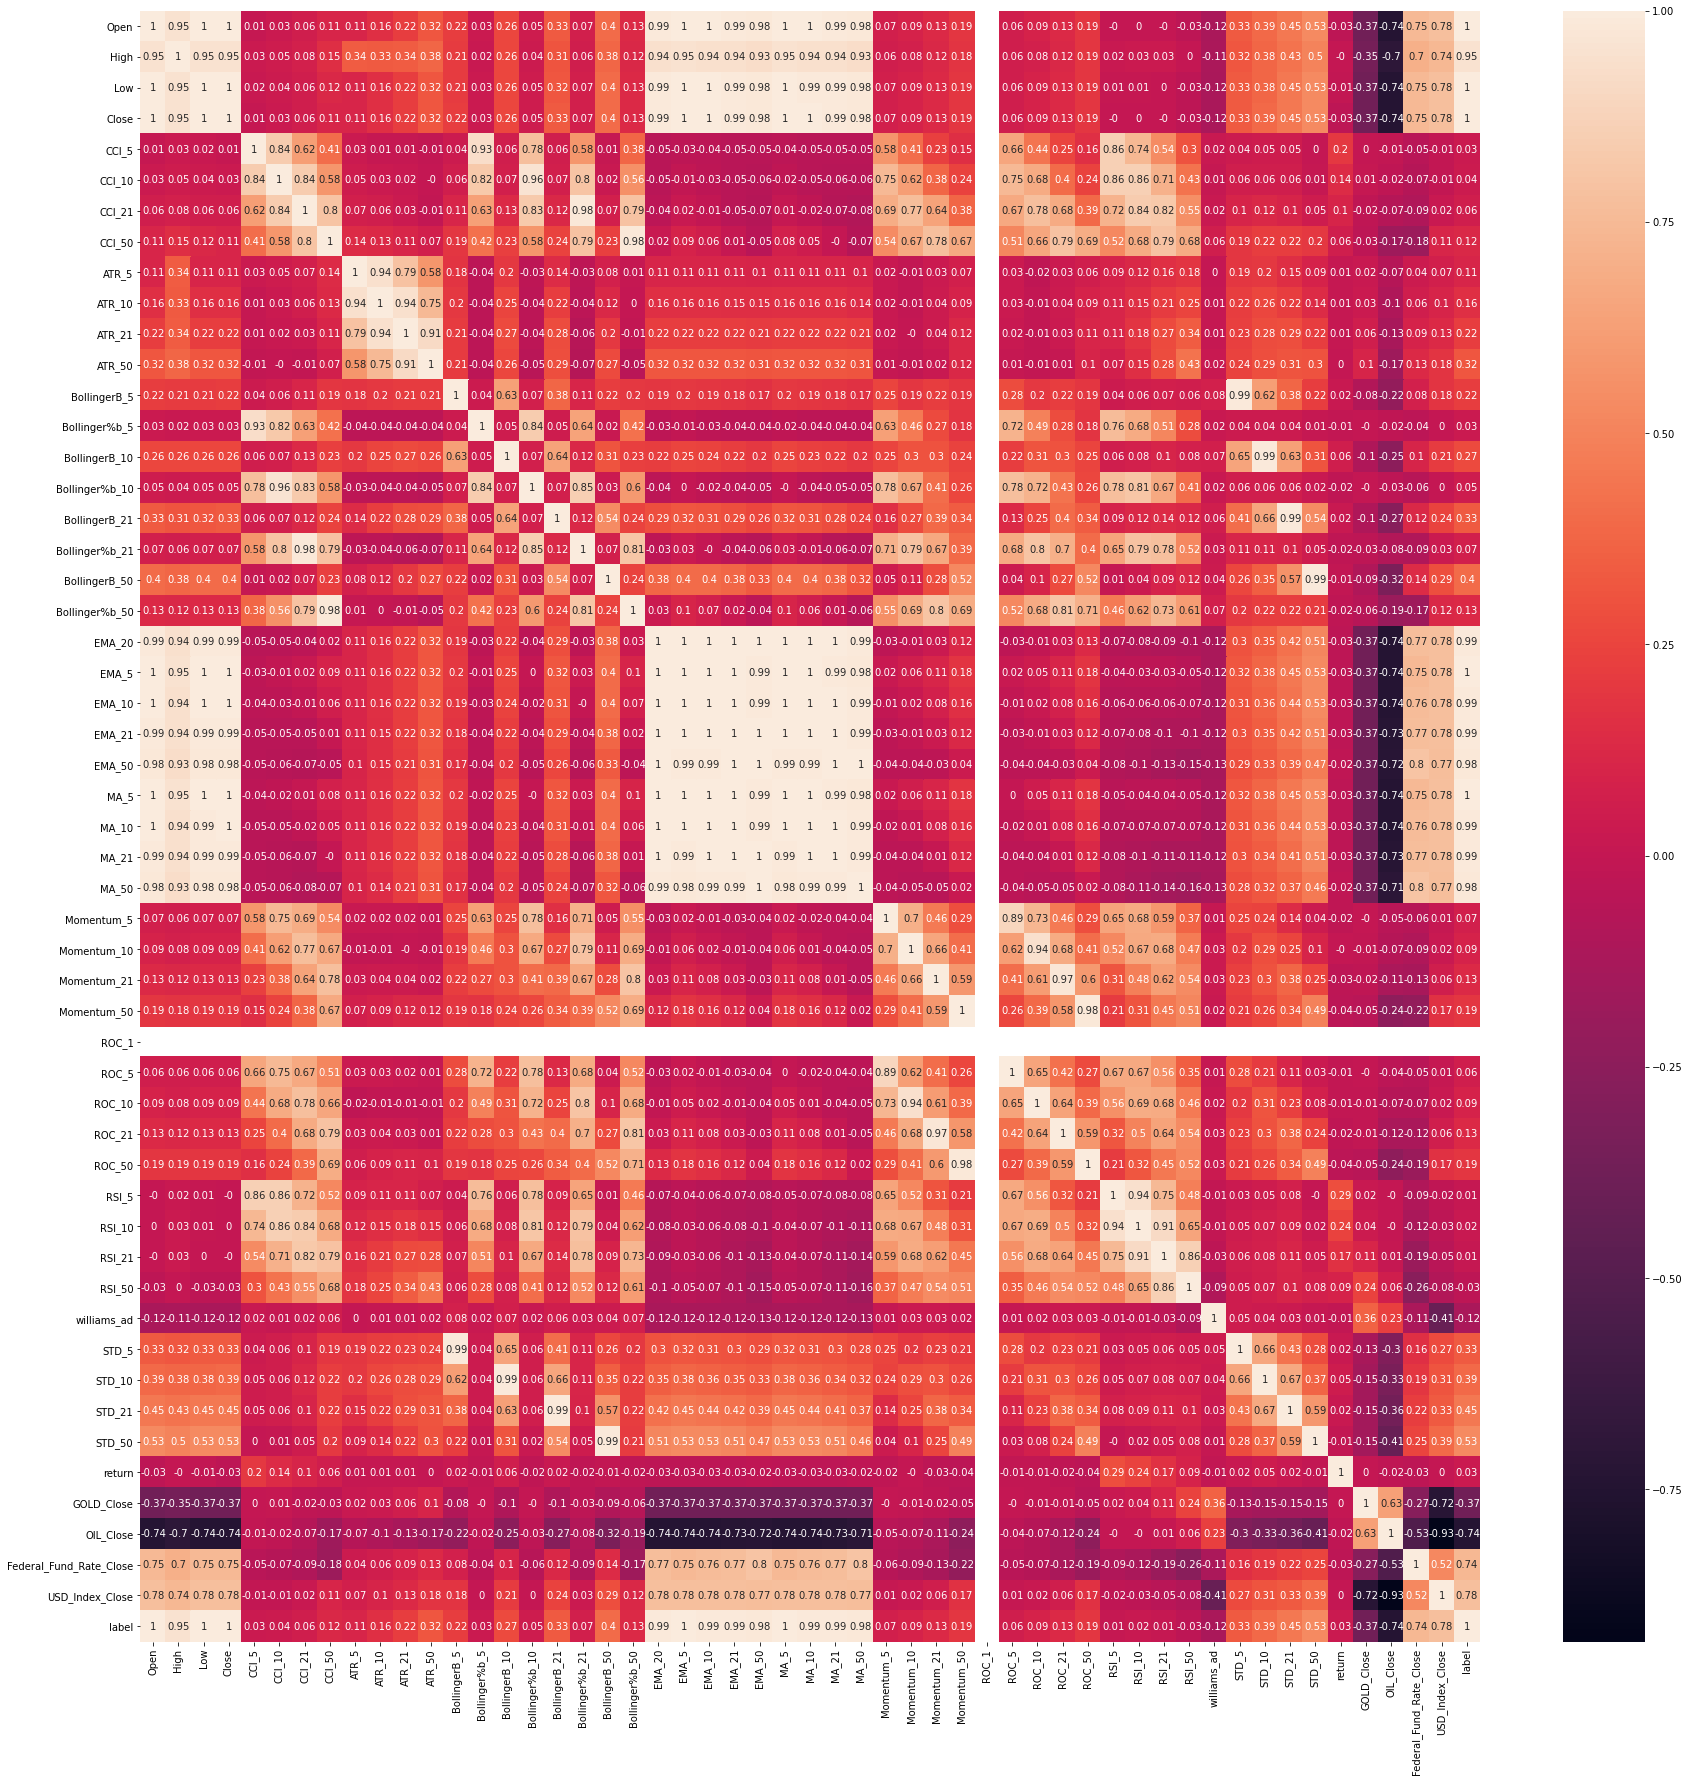

In [6]:
#Correlation is a simple method to select variables, 
#by plotting the correlation matrix we can see that which features are highly correlated with the label.
feat_num = len(feature_names)
corrMatrix = df_result_scaled.corr().round(2)
plt.figure(figsize=(30,30))
sns_plot = sns.heatmap(corrMatrix, annot=True)
plt.show()
sns_plot.figure.savefig("correlation_matrix.png")

We can see that: 
* Open, High, Low, Close, EMA, MA show high positive correlation
* Federal Fund Rate, USD Index, STD, Bollinger show relatively high positive correlation
* Oil, gold, williams_ad show relatively high negative correlation

Another way is to rank the importance of the variables in relevance with the target variable using a regression tree.

### Decision Tree Regression Analysis

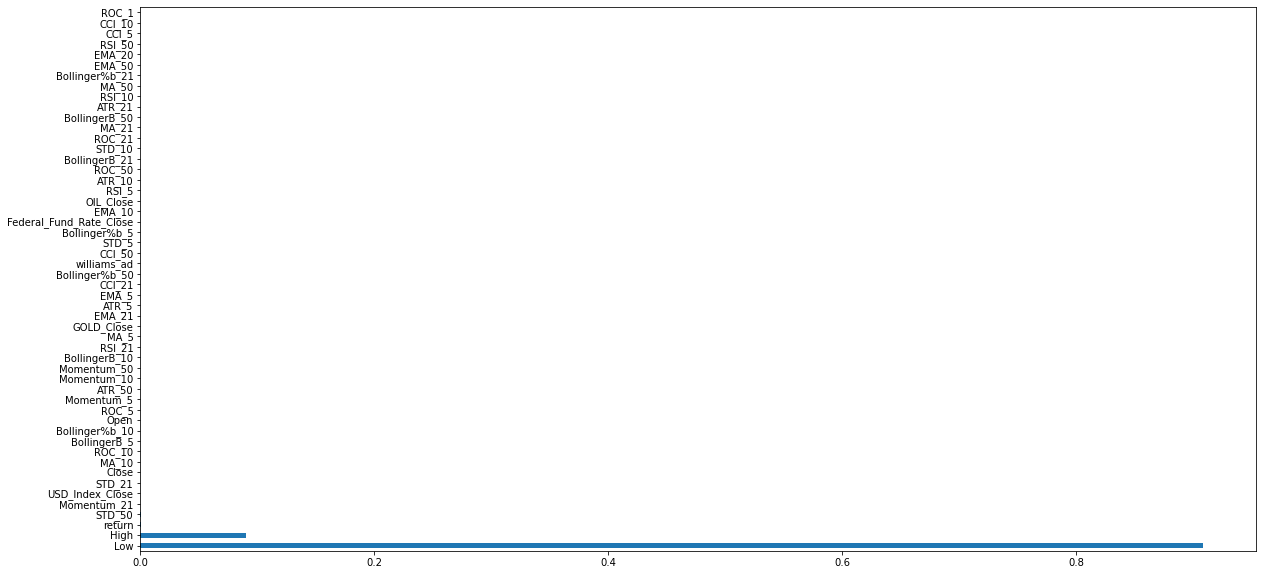

In [7]:
from sklearn.tree import DecisionTreeRegressor
random_state = 1
dtr_model = DecisionTreeRegressor(random_state=random_state)
dtr_model.fit(Xs, y)
plt.figure(figsize=(20,10))
#print(dtr_model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
# #plot graph of feature importances for better visualization
feat_importances = pd.Series(dtr_model.feature_importances_, index=Xs.columns)
feat_importances.nlargest(Xs.shape[1]).plot(kind='barh')
plt.show()

Fom the DTR feature importance above, only High shows to be the important feature

### Self Organising Map Analysis

Here's we manually group the feature to level down the plot of som, as the objective is which laged features to choose out of 5/10/21/50 etcs.

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.05597778052624857


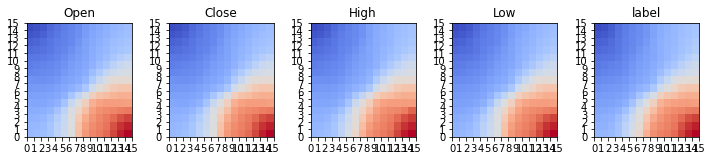

['High', 'Open']
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.5213354713979604


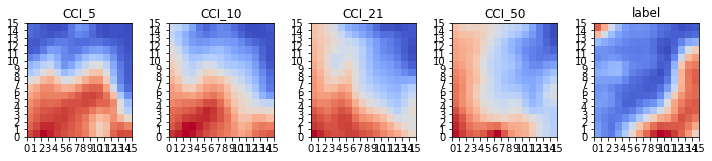

['CCI_5']
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.17111598947610596


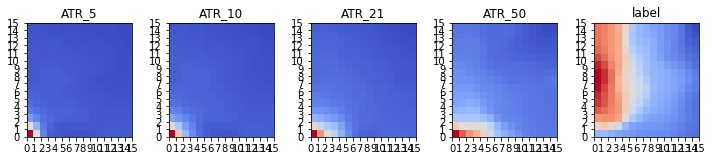

['ATR_50']
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 1.0846735129504839


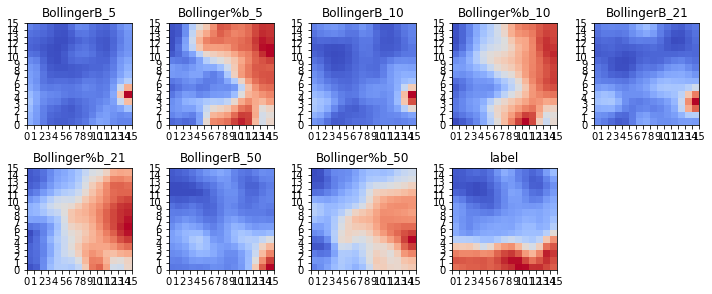

['BollingerB_50', 'BollingerB_5']
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.12640101199167977


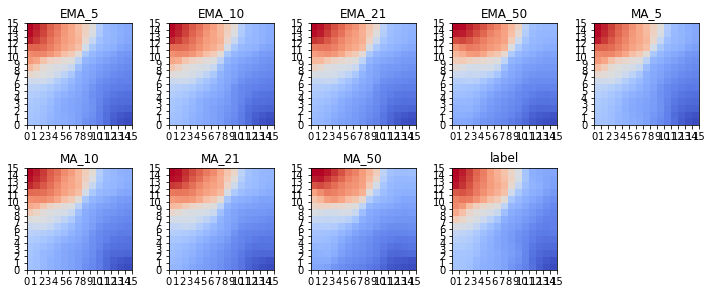

['EMA_5', 'EMA_50']
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.9938855210919425


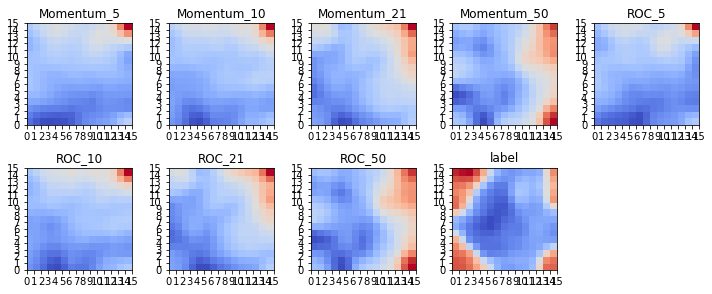

[]
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.4155244434151392


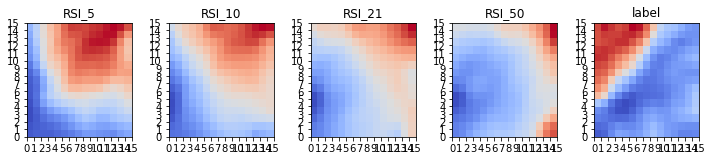

[]
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.5551557578973372


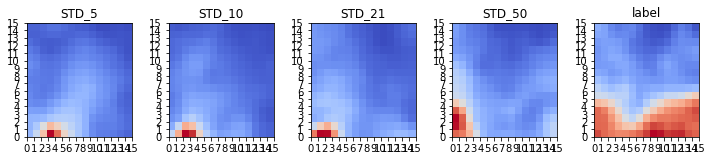

['STD_21']
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.15393587392597788


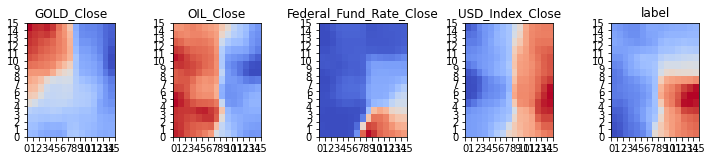

['USD_Index_Close', 'OIL_Close']


In [9]:
feature_groups = [
['Open', 'Close', 'High', 'Low'],
['CCI_5', 'CCI_10', 'CCI_21', 'CCI_50'],
['ATR_5', 'ATR_10', 'ATR_21', 'ATR_50'],
['BollingerB_5', 'Bollinger%b_5', 'BollingerB_10', 'Bollinger%b_10', \
'BollingerB_21', 'Bollinger%b_21', 'BollingerB_50','Bollinger%b_50'],
['EMA_5', 'EMA_10', 'EMA_21', 'EMA_50', 'MA_5', 'MA_10', 'MA_21', 'MA_50'],
['Momentum_5', 'Momentum_10', 'Momentum_21', 'Momentum_50', 'ROC_5', 'ROC_10', 'ROC_21', 'ROC_50'],#'ROC_1', 
['RSI_5', 'RSI_10', 'RSI_21', 'RSI_50'],
['STD_5', 'STD_10', 'STD_21', 'STD_50'],
['GOLD_Close', 'OIL_Close', 'Federal_Fund_Rate_Close', 'USD_Index_Close']]

from utils import fit_som, plt_som, som_feature_selection
for feature_group in feature_groups:
    df_input = Xs[feature_group].join(y)
    feature_group.append(y.name)
    som = fit_som(df_input, size = 15,  sigma=1.5, random_seed=1)
    plt_som(som, feature_group, size = 15)
    W = som.get_weights()
    selected_features, target_name = som_feature_selection(W, df_input.columns, target_index = df_input.shape[1]-1, a = 0.04)
    print(selected_features)

We see that Open, High, Low, Close, and **Label** in the plot have almost identical planes, the same as EMA_*, MA_* and **Label**.

Here's the selected features from SOM:
['High', 'Open']
['CCI_5']
['ATR_50']
['BollingerB_50', 'BollingerB_5']
['EMA_5', 'EMA_50']
['STD_21']
['USD_Index_Close', 'OIL_Close']

We'll use this set of features as the input of LSTM

In [13]:
feature_set = \
['High', 'Open', 'CCI_5', 'ATR_50', 
 'BollingerB_50', 'BollingerB_5', 
 'EMA_5', 'EMA_50', 'STD_21', 
 'USD_Index_Close', 'OIL_Close', 'label']
train_data = train_data[feature_set]
test_data = test_data[feature_set]
label_index = np.where(train_data.columns == 'label')[0][0]
label_index

train_data = train_data.to_numpy()
test_data = test_data.to_numpy()
X_train, y_train = train_data[:,:train_data.shape[1] - 1], train_data[:,label_index].reshape(-1,1)
X_test, y_test = test_data[:,:test_data.shape[1] - 1], test_data[:,label_index].reshape(-1,1)
print(f"Train and Test Size {len(train_data)}, {len(test_data)}")

Train and Test Size 1904, 477


### Data scaling and Shape the tensor data for LSTM
Feature scaling helps the algorithm in converging the local/global minimum efficiently. Different time periods of data have different value ranges and hence we scale/normalize the data.

scaled_train = (train - train_mean) / train_std_deviation

scaled_test = (test - train_mean) / train_std_deviation

In [14]:
# Scale the features for training and test datasets
scalerX = StandardScaler()
scalery = StandardScaler()
X_train_scaled = scalerX.fit_transform(X_train)
X_test_scaled = scalerX.transform(X_test)

y_train_scaled = scalery.fit_transform(y_train)
y_test_scaled = scalery.transform(y_test)

def multivariate_data(X, y, timesteps=60):
    _X = []
    _y = []
    for i in range(timesteps, len(X)):
        _X.append(X[i-timesteps:i,:])
        _y.append(y[i,0])
    _X, _y = np.array(_X), np.array(_y)
    return _X, _y

timesteps = 10
X_train_shaped, y_train_shaped = multivariate_data(X_train_scaled, y_train_scaled, timesteps=timesteps)
X_test_shaped, y_test_shaped = multivariate_data(X_test_scaled, y_test_scaled, timesteps=timesteps)

## Build a 1-layer LSTM Model

First, define the LSTM Recurrent Neural Network by initializing the Sequential Model. We only use 1 LSTM layer in this version. Finally, a Dense layer is used as output layer.

Next, we compile and train the model defined above. Iteratively, we can increase or decrease the epochs and batch size to get more accuracy.

In [15]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
loss_fn = tf.keras.losses.MeanSquaredError()

model = Simple_LSTM_Model('USDGBP=X', time_step = timesteps, \
                          batch_size = 512, epochs = 500, verbose = 1, \
                          opt = opt, loss_fn = loss_fn, metrics = ['mse'])
model.fit(X_train_shaped, y_train_shaped, \
          layers=[100, 1], earlystopping = True, patience = 50, \
          validation_split = 0.15, shuffle = True)

Epoch 1/500
4/4 [==============================] - 1s 213ms/step - loss: 0.5698 - mse: 0.5698 - val_loss: 0.7883 - val_mse: 0.7883
Epoch 2/500
4/4 [==============================] - 0s 52ms/step - loss: 0.1126 - mse: 0.1126 - val_loss: 0.0843 - val_mse: 0.0843
Epoch 3/500
4/4 [==============================] - 0s 45ms/step - loss: 0.0985 - mse: 0.0985 - val_loss: 0.0992 - val_mse: 0.0992
Epoch 4/500
4/4 [==============================] - 0s 51ms/step - loss: 0.0634 - mse: 0.0634 - val_loss: 0.0614 - val_mse: 0.0614
Epoch 5/500
4/4 [==============================] - 0s 51ms/step - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 6/500
4/4 [==============================] - 0s 53ms/step - loss: 0.0295 - mse: 0.0295 - val_loss: 0.0338 - val_mse: 0.0338
Epoch 7/500
4/4 [==============================] - 0s 58ms/step - loss: 0.0314 - mse: 0.0314 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 8/500
4/4 [==============================] - 0s 52ms/step - loss: 0.0204 - mse: 0.0

### Evaluate the model

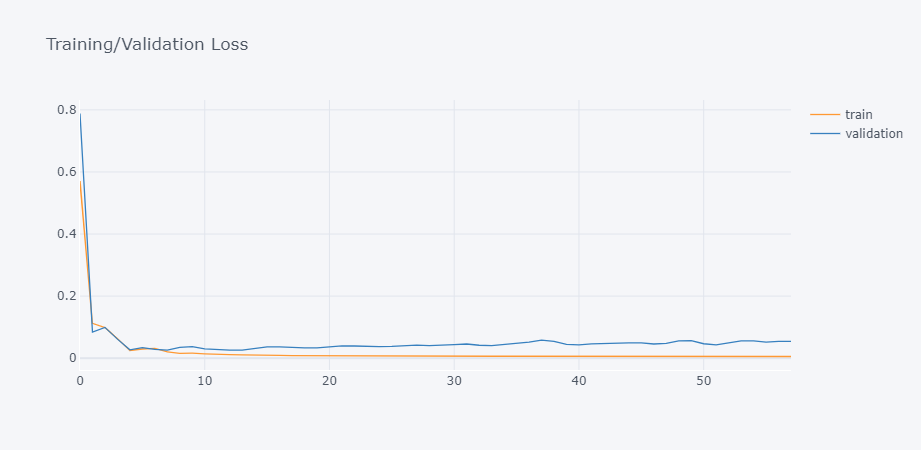

15/15 [==============================] - 0s 2ms/step


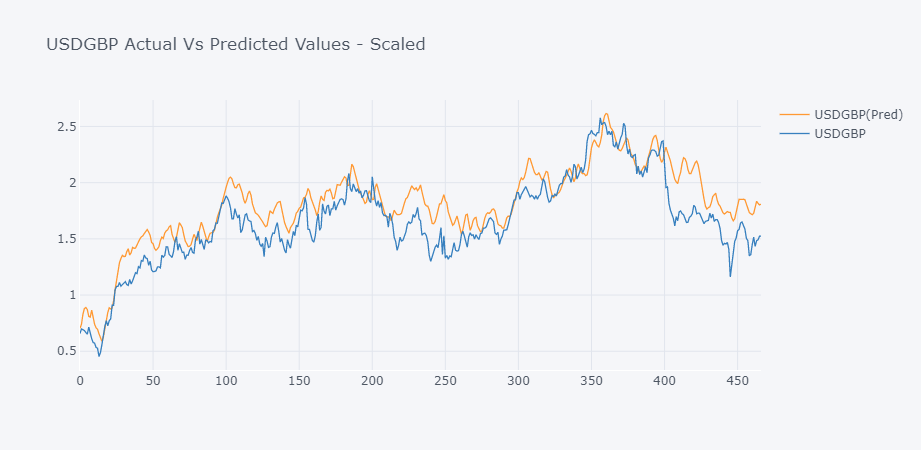

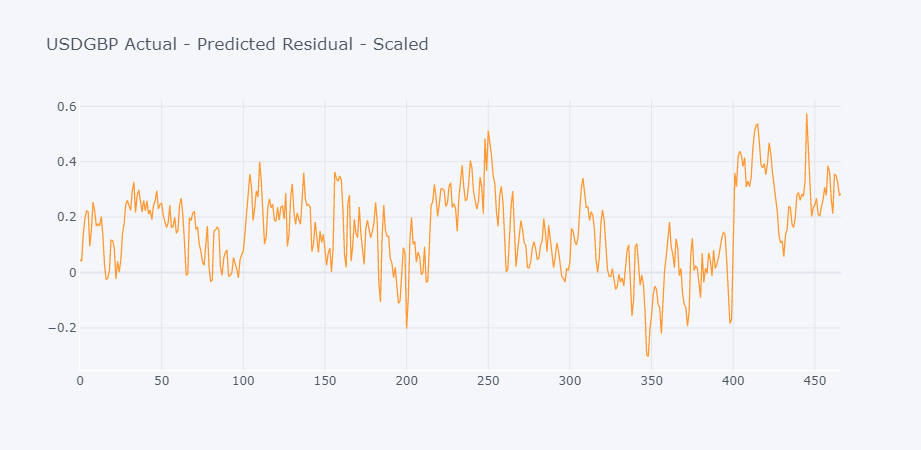

15/15 [==============================] - 0s 3ms/step - loss: 0.0441 - mse: 0.0441
mse : 0.044078387320041656


In [16]:
import cufflinks as cf
cf.set_config_file(offline=True)
history = model.history
# Visualize the training and validation loss
loss_df = pd.DataFrame({'train': history.history['loss'], 'validation': history.history['val_loss']})
loss_df.iplot(title='Training/Validation Loss')
y_pred = model.predict(X_test_shaped)
result = pd.DataFrame(y_pred)
result.columns = ['USDGBP(Pred)']
result['USDGBP'] = y_test_shaped
result.iplot(title='USDGBP Actual Vs Predicted Values - Scaled')
(result['USDGBP(Pred)'] - result['USDGBP']).iplot(title='USDGBP Actual - Predicted Residual - Scaled')
print(model.model.metrics_names[1], ':', model.model.evaluate(X_test_shaped, y_test_shaped, verbose=1)[1])

## Build a 2-layer LSTM Model with dropout

First, define the LSTM Recurrent Neural Network by initializing the Sequential Model. We'll add more LSTM layers and adjust the Dropout in order to improve the accuracy of our model. Finally, a Dense layer is used as output layer.

Next, we compile and train the model defined above. Iteratively, we can increase or decrease the epochs and batch size to get more accuracy.

In [17]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
loss_fn = tf.keras.losses.MeanSquaredError()

model_2layer = LSTMModel('USDGBP=X', time_step = timesteps, \
                         batch_size = 512, epochs = 500, verbose = 1, \
                         opt = opt, loss_fn = loss_fn, metrics = ['mse'])
model_2layer.fit(X_train_shaped, y_train_shaped, \
                 layers=[256, 256, 64, 1], dropout_rate=0.5, earlystopping = True, patience = 50, \
                 validation_split = 0.15, shuffle = True)

Epoch 1/500
4/4 [==============================] - 2s 475ms/step - loss: 10.5928 - mse: 0.3608 - val_loss: 10.4400 - val_mse: 0.2471
Epoch 2/500
4/4 [==============================] - 1s 187ms/step - loss: 10.2582 - mse: 0.0841 - val_loss: 10.1832 - val_mse: 0.0565
Epoch 3/500
4/4 [==============================] - 1s 172ms/step - loss: 10.1703 - mse: 0.0605 - val_loss: 10.3159 - val_mse: 0.2521
Epoch 4/500
4/4 [==============================] - 1s 175ms/step - loss: 10.1003 - mse: 0.0541 - val_loss: 10.0344 - val_mse: 0.0323
Epoch 5/500
4/4 [==============================] - 1s 186ms/step - loss: 10.0229 - mse: 0.0377 - val_loss: 9.9709 - val_mse: 0.0307
Epoch 6/500
4/4 [==============================] - 1s 172ms/step - loss: 9.9555 - mse: 0.0317 - val_loss: 9.9927 - val_mse: 0.1135
Epoch 7/500
4/4 [==============================] - 1s 190ms/step - loss: 9.8975 - mse: 0.0351 - val_loss: 9.8490 - val_mse: 0.0302
Epoch 8/500
4/4 [==============================] - 1s 184ms/step - loss: 9

### Evaluate the model

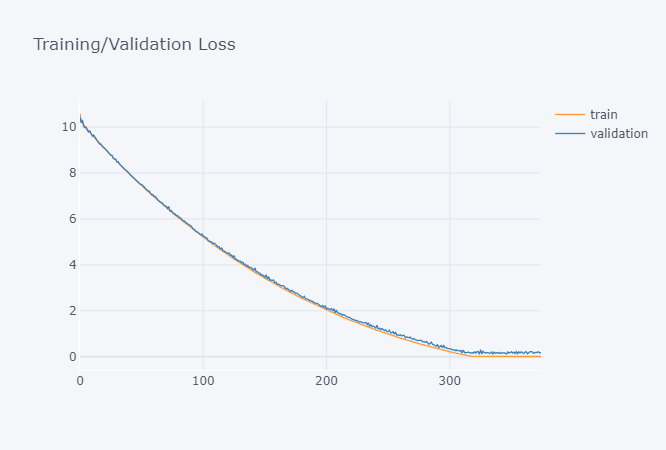

15/15 [==============================] - 0s 11ms/step


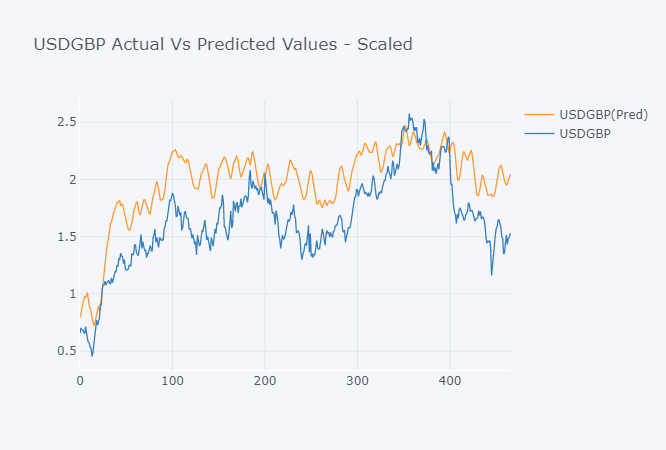

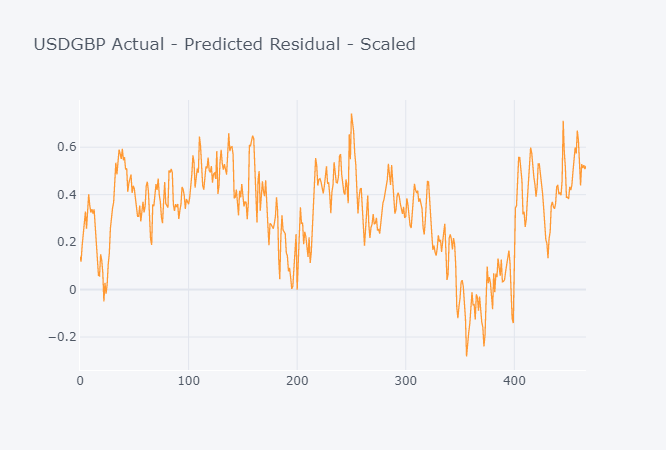

15/15 [==============================] - 0s 16ms/step - loss: 0.1447 - mse: 0.1426
mse : 0.1426151990890503


In [18]:
import cufflinks as cf
cf.set_config_file(offline=True)
history = model_2layer.history
# Visualize the training and validation loss
loss_df = pd.DataFrame({'train': history.history['loss'], 'validation': history.history['val_loss']})
loss_df.iplot(title='Training/Validation Loss')
y_pred = model_2layer.predict(X_test_shaped)
result = pd.DataFrame(y_pred)
result.columns = ['USDGBP(Pred)']
result['USDGBP'] = y_test_shaped
result.iplot(title='USDGBP Actual Vs Predicted Values - Scaled')
(result['USDGBP(Pred)'] - result['USDGBP']).iplot(title='USDGBP Actual - Predicted Residual - Scaled')
print(model_2layer.model.metrics_names[1], ':', model_2layer.model.evaluate(X_test_shaped, y_test_shaped, verbose=1)[1])

## Bulk Experiment Result - Continuous

The experiment procedure has been wrapped into the *bulk_run* function, here we plot all the results.

In [19]:
def single_run(key, step_dict, X_train, X_test, y_train, y_test, \
    opt = opt, loss_fn = loss_fn, metrics = ['mse'], if_binary = False):
    if step_dict['sae'] == True:
        sae_model = StackedAutoencoderModel(key, verbose=0)
        sae_model.fit(X_train, X_test, target_feature_number=4)
        X_train = sae_model.get_encoder(X_train)
        X_test = sae_model.get_encoder(X_test)
    X_train_shaped, y_train_shaped = multivariate_data(X_train, y_train, timesteps=step_dict['timestep'])
    X_test_shaped, y_test_shaped = multivariate_data(X_test, y_test, timesteps=step_dict['timestep'])
    if step_dict['lstm'] == '1layer':
        #print(metrics)
        model = Simple_LSTM_Model(key, \
                                  batch_size = 512, epochs = 500, verbose = 0, \
                                  opt = opt, loss_fn = loss_fn, metrics = metrics, if_binary = if_binary)
    elif step_dict['lstm'] == '2layer':
        model = LSTMModel(key, time_step = timesteps, \
                          batch_size = 512, epochs = 500, verbose = 0, \
                          opt = opt, loss_fn = loss_fn, metrics = metrics, if_binary = if_binary)

    model.fit(X_train_shaped, y_train_shaped)
    return model, model.model.evaluate(X_test_shaped, y_test_shaped, verbose=1)[1]

def bulk_run(key, X_train, X_test, y_train, y_test, \
    timsteps_lst=[5, 10, 30], \
    algorithm_lst=['1layer LSTM', '2layer LSTM', 'sae + 1layer LSTM', 'sae + 2layer LSTM'], \
    opt = opt, loss_fn = loss_fn, metrics = ['mse'], if_binary = False):
    step_dict = {}
    o_lst = []
    m_lst = []
    for timstep in timsteps_lst:
        step_dict['timestep'] = timstep
        for algorithm in algorithm_lst:
            if algorithm == '1layer LSTM':
                step_dict['sae'] = False
                step_dict['lstm'] = '1layer'
            if algorithm == '2layer LSTM':
                step_dict['sae'] = False
                step_dict['lstm'] = '2layer' 
            if algorithm == 'sae + 1layer LSTM':
                step_dict['sae'] = True
                step_dict['lstm'] = '1layer' 
            if algorithm == 'sae + 2layer LSTM':
                step_dict['sae'] = True
                step_dict['lstm'] = '2layer' 
            m, o = single_run(key, step_dict, X_train, X_test, y_train, y_test, opt = opt, loss_fn = loss_fn, metrics = metrics, if_binary = if_binary)
            o_lst.append({'timestep':timstep, 'algorithm':algorithm, metrics[0]: o})
            m_lst.append({'timestep':timstep, 'algorithm':algorithm, 'model': m})
    return m_lst, o_lst

In [20]:
m, o = single_run('USDGBP=X', {'sae': True, 'timestep': 5, 'lstm': '1layer'},  X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled)

Model fitted successfully
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100)               44800     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 44,901
Trainable params: 44,901
Non-trainable params: 0
_________________________________________________________________
15/15 [==============================] - 0s 2ms/step - loss: 0.0205 - mse: 0.0205


In [21]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
loss_fn = tf.keras.losses.MeanSquaredError()
timsteps_lst=[5, 10, 30]
algorithm_lst=['1layer LSTM', '2layer LSTM', 'sae + 1layer LSTM', 'sae + 2layer LSTM']
m_lst, o_lst = bulk_run('USDGBP=X', X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, \
                        timsteps_lst=timsteps_lst, algorithm_lst=algorithm_lst)

Model fitted successfully
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100)               44800     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 101       
Total params: 44,901
Trainable params: 44,901
Non-trainable params: 0
_________________________________________________________________
15/15 [==============================] - 0s 2ms/step - loss: 0.0240 - mse: 0.0240
Model fitted successfully
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 5, 256)            274432    
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 256)            0         
__________________________

In [47]:
pd.DataFrame(o_lst)

,timestep,algorithm,mse
0,5,1layer LSTM,0.027009
1,5,2layer LSTM,0.057101
2,5,sae + 1layer LSTM,0.026283
3,5,sae + 2layer LSTM,0.056826
4,10,1layer LSTM,0.026528
5,10,2layer LSTM,0.097710
6,10,sae + 1layer LSTM,0.025094
7,10,sae + 2layer LSTM,0.089928
8,30,1layer LSTM,0.056609
9,30,2layer LSTM,0.146134


## Bulk Experiment Result - Binary

The experiment procedure has been wrapped into the *bulk_run* function, here we plot all the results.

In [22]:
start_date='2010-09-10'
end_date='2020-01-10'
df_bin = prep_ticker_data('USDGBP=X', start_date = start_date, end_date = end_date, \
                             if_features_delta = False, if_target_delta = True, \
                             if_features_binary = False, if_target_binary = True, \
                             shift_days = 1, target_variable = 'label')
#replace the label with binary result
df_result['label'] = df_bin['label']


train_data, test_data = train_test_split(df_result, train_size=0.8, test_size=0.2, shuffle=False)
feature_set = \
['High', 'Open', 'CCI_5', 'ATR_50', 
 'BollingerB_50', 'BollingerB_5', 
 'EMA_5', 'EMA_50', 'STD_21', 
 'USD_Index_Close', 'OIL_Close', 'label']
train_data = train_data[feature_set]
test_data = test_data[feature_set]
label_index = np.where(train_data.columns == 'label')[0][0]
label_index
train_data = train_data.to_numpy()
test_data = test_data.to_numpy()
X_train, y_train = train_data[:,:train_data.shape[1] - 1], train_data[:,label_index].reshape(-1,1)
X_test, y_test = test_data[:,:test_data.shape[1] - 1], test_data[:,label_index].reshape(-1,1)

timesteps = 10
X_train_shaped, y_train_shaped = multivariate_data(X_train_scaled, y_train, timesteps=timesteps)
X_test_shaped, y_test_shaped = multivariate_data(X_test_scaled, y_test, timesteps=timesteps)

[*********************100%***********************]  1 of 1 completed


In [23]:
from ext_metrics import f1_m
opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
loss_fn = tf.keras.losses.MeanSquaredError()
opt = tf.keras.optimizers.Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
loss_fn = tf.keras.losses.BinaryCrossentropy()

simple_binary_model = Simple_LSTM_Model('USDGBP=X', time_step = timesteps, \
                                        batch_size = 64, epochs = 500, verbose = 1, \
                                        opt = opt, loss_fn = loss_fn, metrics = [f1_m, 'accuracy'], if_binary=True)
simple_binary_model.fit(X_train_shaped, y_train_shaped, \
                        layers=[100, 1], earlystopping = True, patience = 50, \
                        validation_split = 0.15, shuffle = True)

Epoch 1/500
26/26 [==============================] - 1s 43ms/step - loss: 0.6969 - f1_m: 0.5455 - accuracy: 0.5003 - val_loss: 0.6922 - val_f1_m: 0.3507 - val_accuracy: 0.5193
Epoch 2/500
26/26 [==============================] - 0s 14ms/step - loss: 0.6913 - f1_m: 0.6047 - accuracy: 0.5177 - val_loss: 0.6897 - val_f1_m: 0.3696 - val_accuracy: 0.5404
Epoch 3/500
26/26 [==============================] - 0s 14ms/step - loss: 0.6907 - f1_m: 0.5575 - accuracy: 0.5190 - val_loss: 0.6959 - val_f1_m: 0.5665 - val_accuracy: 0.5053
Epoch 4/500
26/26 [==============================] - 0s 14ms/step - loss: 0.6891 - f1_m: 0.6344 - accuracy: 0.5326 - val_loss: 0.6901 - val_f1_m: 0.5319 - val_accuracy: 0.5474
Epoch 5/500
26/26 [==============================] - 0s 14ms/step - loss: 0.6870 - f1_m: 0.6218 - accuracy: 0.5426 - val_loss: 0.6963 - val_f1_m: 0.5555 - val_accuracy: 0.5053
Epoch 6/500
26/26 [==============================] - 0s 15ms/step - loss: 0.6868 - f1_m: 0.5636 - accuracy: 0.5351 - val

In [24]:
print(simple_binary_model.model.evaluate(X_test_shaped, y_test_shaped, verbose=1))
print(simple_binary_model.model.metrics_names)

15/15 [==============================] - 0s 3ms/step - loss: 0.7982 - f1_m: 0.4182 - accuracy: 0.5161
[0.7981968522071838, 0.4182472825050354, 0.516059935092926]
['loss', 'f1_m', 'accuracy']


In [25]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
loss_fn = tf.keras.losses.BinaryCrossentropy()
metrics = ['accuracy']
timsteps_lst=[5, 10, 30]
algorithm_lst=['1layer LSTM', '2layer LSTM', 'sae + 1layer LSTM', 'sae + 2layer LSTM']
binary_m_lst, binary_o_lst = bulk_run('USDGBP=X', X_train_scaled, X_test_scaled, y_train, y_test, \
                                      timsteps_lst=timsteps_lst, algorithm_lst=algorithm_lst, \
                                      opt = opt, loss_fn = loss_fn, metrics = metrics, if_binary = True)

Model fitted successfully
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 100)               44800     
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 101       
Total params: 44,901
Trainable params: 44,901
Non-trainable params: 0
_________________________________________________________________
15/15 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.5212
Model fitted successfully
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 5, 256)            274432    
_________________________________________________________________
dropout_14 (Dropout)         (None, 5, 256)            0         
___________________

In [150]:
pd.DataFrame(binary_o_lst)

,timestep,algorithm,accuracy
0,5,1layer LSTM,0.506356
1,5,2layer LSTM,0.544492
2,5,sae + 1layer LSTM,0.521186
3,5,sae + 2layer LSTM,0.555085
4,10,1layer LSTM,0.533191
5,10,2layer LSTM,0.511777
6,10,sae + 1layer LSTM,0.518201
7,10,sae + 2layer LSTM,0.522484
8,30,1layer LSTM,0.519016
9,30,2layer LSTM,0.431767
